## Importing Modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## READNING DATA

In [6]:
data=pd.read_csv("dataset.csv")

In [7]:
data.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


## PLOTTING CORELATION FUNCTION


<AxesSubplot:>

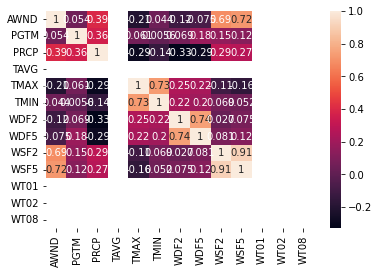

In [9]:
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

## PAIR PLOTS

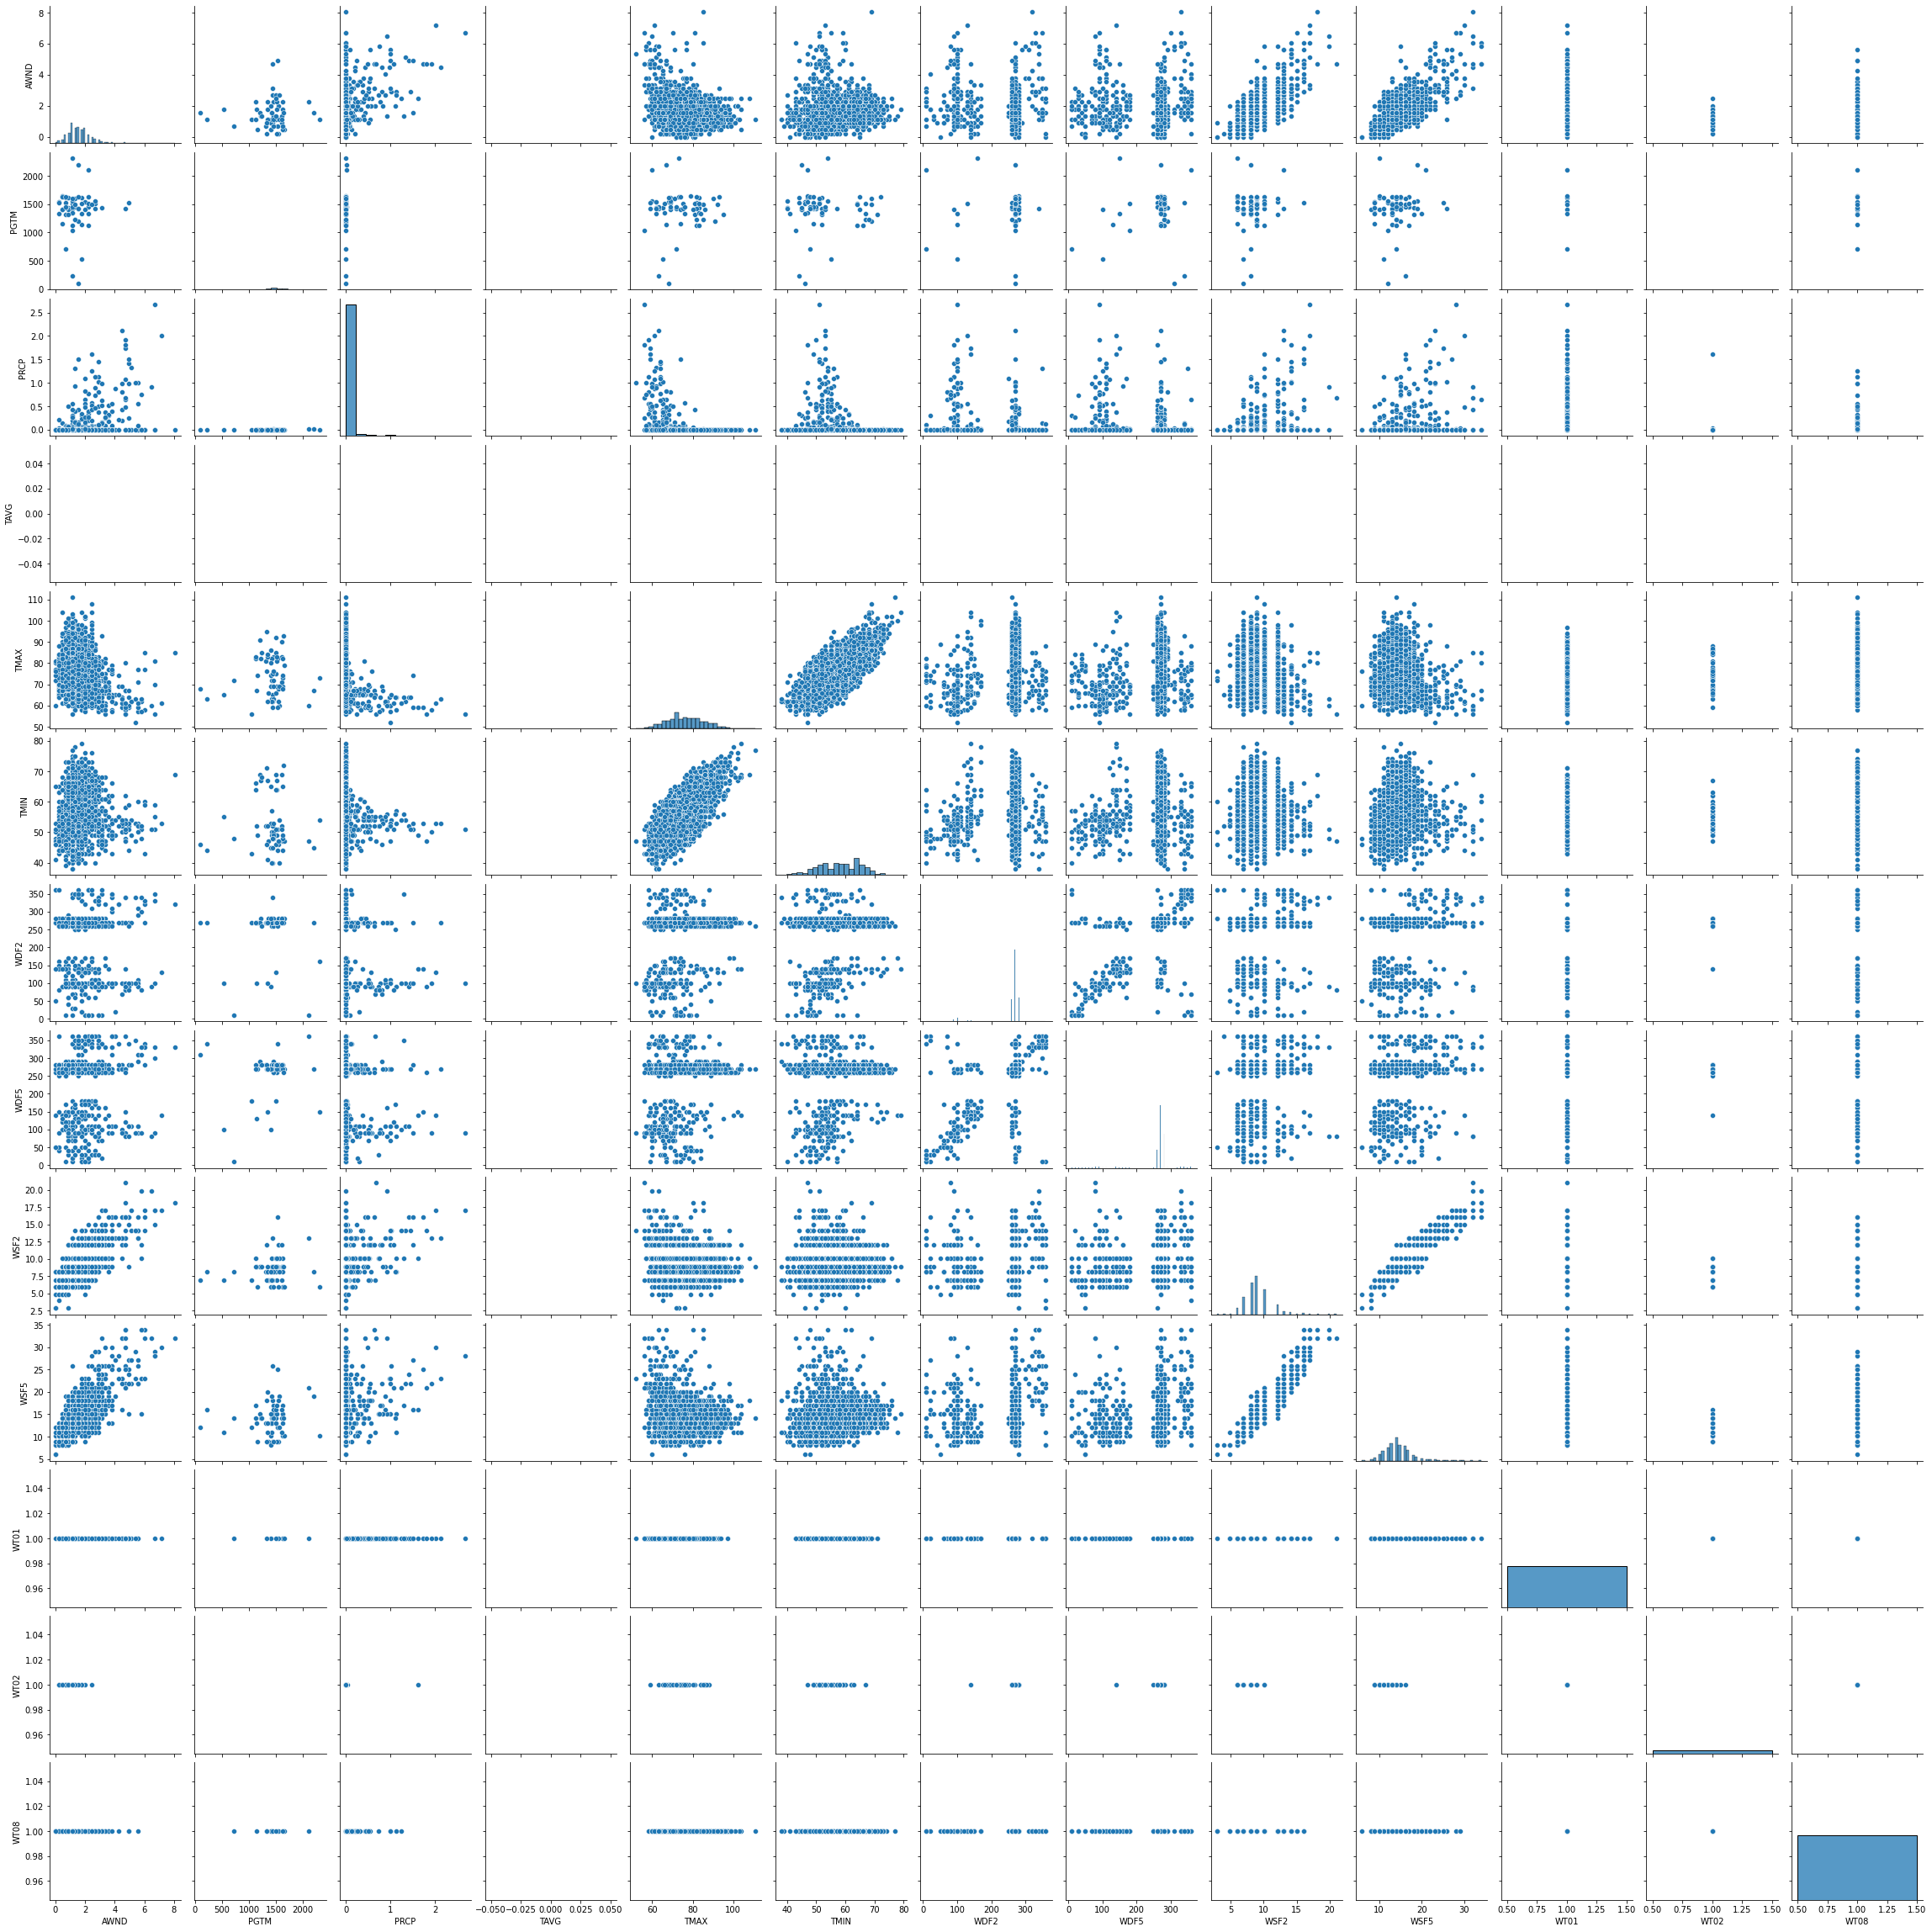

In [10]:
sns.pairplot(data)

## CONVERTING ALL PRECIPITATION VALUES GREATER THAN 0 TO 1

In [22]:
data.loc[data['PRCP']>0,'PRCP']=1  
#All PRCP values greater than 0 have been converted to 1

In [25]:
data.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.0,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.0,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.0,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,1.0,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.0,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [26]:
# SAVING THE DATAFRAME 
data.to_csv('dataset.csv')

In [34]:
data['PRCP'].nunique()
#Two unique values if PRCP i.e 0 and 1


2

## COUNTING THE NUMBER OF 1's and 0's IN NEW DATASET

In [35]:
occur = data.groupby(['PRCP']).size()
display(occur)

PRCP
0.0    1660
1.0     167
dtype: int64

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

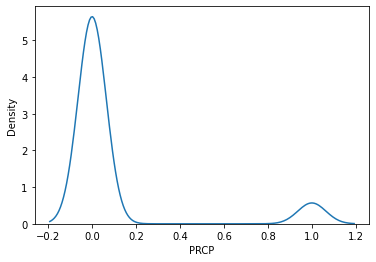

In [37]:
sns.kdeplot(data['PRCP'])

C:\Users\hrith\AppData\Local\Temp\ipykernel_30996\4028505467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRCP'],kde=False,bins=2)


<AxesSubplot:xlabel='PRCP'>

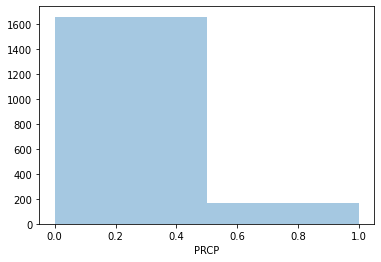

In [41]:
sns.distplot(data['PRCP'],kde=False,bins=2)

In [36]:
# As we can see the dataset is Imbalanced (no of 0's >> no to 1's) we have to use SMOTE to balance it.